# Final Project : Logit Regression to identify the various factors that may influence admission into graduate school.

# Submitted By: Akhil Parashara

# W1166146

# aparashara@scu.edu

# Introduction: 

Logistic regression, also called a logit model, is used to model dichotomous outcome variables. In the logit model the log odds of the outcome is modeled as a linear combination of the predictor variables.

We have take the datasource from UCLA which has the following predictors Variables
gpa --> GPA of undergrad School
gre score
rank or Reputation of an applicant's undergraduate alma mater
The final column in the dataset "Admit" which has a binary value of 0 or 1; 0--> Not Admitted , 1--> Admitted

# Step -1 Load the Libraries and Dataset 

The first and foremost step is to load the libraries and dataset. For this project, I have used Pandas and Numpy for standard data analysis, Statsmodel for modelling and training the data and finally Pylab for the plotting

In [86]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

# read the data in
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")
df.columns = ["admit", "gre", "gpa", "undergrad_rep"]
df.head()

,admit,gre,gpa,undergrad_rep
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


# Step-2: Looking at the data

The best way look and analyse the data is using plots. I have used histogram to visualize the total count based on each of the 4 fields. If you look at the histogram below, the 1st graph shows the that only 175 students got admitted(admit value=1). Looking more into the insight of GRE scores, it looks like the most of the students have a GRE score of 600, which is good to get admission.

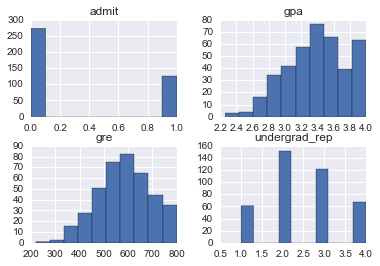

In [87]:
df.hist()
pl.show()

# Crosstab: crosstab makes it really easy to do multidimensional frequency tables

Below we are using crosstab to calculate the frequency of number admits based on the undergrad Reputation and number of admits based on GRE scores


In [112]:
#Printing Frequency chart for admits vs UnderGrad Reputation
print pd.crosstab(df['admit'], df['undergrad_rep'], rownames=['admit'])

undergrad_rep   1   2   3   4
admit                        
0              28  97  93  55
1              33  54  28  12


In [113]:
#Printing Frequency chart for admits vs GRE Score
print pd.crosstab(df1['admit'], df1['gre'], rownames=['admit'])

gre    220  300  340  360  380  400  420  440  460  480 ...   620  640  660  \
admit                                                   ...                   
0        1    2    3    4    8    9    7    8   10   10 ...    18   16   12   
1        0    1    1    0    0    2    0    2    4    6 ...    12    5   12   

gre    680  700  720  740  760  780  800  
admit                                     
0       11   17    8    7    1    1   14  
1        9    5    3    4    4    4   11  

[2 rows x 26 columns]


# Step -3 Creating Dummy Variables

Using pandas gives  a great amount of control over how these  variables are represented. We're going dummify the "Undergrad_rep" column using get_dummies.

get_dummies creates a new DataFrame with binary indicator variables for each category/option in the column specified. In this case, Undergrad_rep column has four levels: 1, 2, 3 and 4 (1 being most reputed). When we call get_dummies, we get a dataframe with four columns, each of which describes one of those levels.

After doing that,I merge the new dummy columns in the original dataset and removed the undergrad_rep column because its not needed after that.

Finally, I  added a fix term for the Logistic Regression. The statsmodels function  requires that intercepts/constants are specified explicitly.

In [102]:

dummy_ranks = pd.get_dummies(df['undergrad_rep'], prefix='undergrad_rep')
print dummy_ranks.head()


# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'undergrad_rep_2':])
print data.head()

#manually assigning the intercept
data['intercept'] = 1.0

   undergrad_rep_1  undergrad_rep_2  undergrad_rep_3  undergrad_rep_4
0              0.0              0.0              1.0              0.0
1              0.0              0.0              1.0              0.0
2              1.0              0.0              0.0              0.0
3              0.0              0.0              0.0              1.0
4              0.0              0.0              0.0              1.0
   admit  gre   gpa  undergrad_rep_2  undergrad_rep_3  undergrad_rep_4
0      0  380  3.61              0.0              1.0              0.0
1      1  660  3.67              0.0              1.0              0.0
2      1  800  4.00              0.0              0.0              0.0
3      1  640  3.19              0.0              0.0              1.0
4      0  520  2.93              0.0              0.0              1.0


# Finally getting down to REAL Business REGRESSION

The first step in regression is to Specify the column variables that we want to predict then followed by the columns that our model should use to predict.

In this case I am  predicting the admit column based on gre, gpa, and the UnderGrad reputation dummy variables gre, gpa, undergrad_rep_2, undergrad_rep_3, undergrad_rep_4. We're going to treat undergrad_rep_1 as our base and exclude it from our fit. I did this to prevent multicollinearity

I am using the statsmodels Logit function to do the Logistic regression

In [103]:
col_train = data.columns[1:]
# Index([gre, gpa, undergrad_rep_2, undergrad_rep_3, undergrad_rep_4], dtype=object)

logit = sm.Logit(data['admit'], data[col_train])

# fit the model
result = logit.fit()


Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


# Analysizing the Regression Results:

From the two results set, it seems quite evident that there is an inverse relationship between the probability of being admitted and the reputation of the undergrad School.

In other words, the probability getting addmitted into a graduate course is more for students who have attended a well reputated  ranked undergraduate school (undergrad_rep_1==True) in contrast  to the lower ranked schools (undergrad_rep==2 or 3 or 4).

In [95]:

# cool enough to deserve it's own gist
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Sun, 27 Nov 2016   Pseudo R-squ.:                 0.03927
Time:                        16:54:26   Log-Likelihood:                -240.17
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 5.456e-05
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0027      0.001      2.544      0.011         0.001     0.005
gpa            0.7547      0.320      2.361      0.018         0.128     1.381
intercept     -4.9494      1.075     -4.604      0.0

In [104]:

# look at the confidence interval of each coeffecient
print result.conf_int()

                        0         1
gre              0.000120  0.004409
gpa              0.153684  1.454391
undergrad_rep_2 -1.295751 -0.055135
undergrad_rep_3 -2.016992 -0.663416
undergrad_rep_4 -2.370399 -0.732529
intercept       -6.224242 -1.755716


# Evaluation/Prediction 

In order to evaluate the classifier, I re-created the dataset with  logical combination of input values. From that, i can see how the predicted probability of getting an admit improves/decreases with different variables. 

Initial step in that is to  generate the combinations using a helper function called cartesian(http://stackoverflow.com/questions/1208118/using-numpy-to-build-an-array-of-all-combinations-of-two-arrays)

I used np.linspace to create a range of values for "gre" and "gpa". It is a  linearly spaced values from a specified min and maximum value which correlates to minimum and maximum values from the dataset

In [114]:

gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres

gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas



# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'undergrad_rep', 'intercept']
dummy_ranks = pd.get_dummies(combos['undergrad_rep'], prefix='undergrad_rep')
dummy_ranks.columns = ['undergrad_rep_1', 'undergrad_rep_2', 'undergrad_rep_3', 'undergrad_rep_4']

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'undergrad_rep', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'undergrad_rep_2':])

# make predictions on the enumerated dataset
combos['admit_pred'] = result.predict(combos[col_train])
print combos.head()




[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]
     gre       gpa  undergrad_rep  intercept  undergrad_rep_2  \
0  220.0  2.260000            1.0        1.0              0.0   
1  220.0  2.260000            2.0        1.0              1.0   
2  220.0  2.260000            3.0        1.0              0.0   
3  220.0  2.260000            4.0        1.0              0.0   
4  220.0  2.453333            1.0        1.0              0.0   

   undergrad_rep_3  undergrad_rep_4  admit_pred  
0              0.0              0.0    0.157801  
1              0.0              0.0    0.087056  
2              1.0              0.0    0.046758  
3              0.0              1.0    0.038194  
4              0.0              0.0    0.179574  


# Plotting the   Prediction

After the prediction is done, I have generated  some plots to visualize the results. I created a small  function called isolate_and_plot which compars variable with the different undergrad reputation and the mean probability for that combination.  I have also  a pivot_table which allows you to easily aggregate the data.

The  plots below shows how gre, gpa, and undergrad reputation affect the admission levels. It is quite vivid that  probability of getting and admit increases as gre and gpa increase and that the different undergrad reputation levels yield drastic probabilities of admission (particularly the most/least prestigious schools).

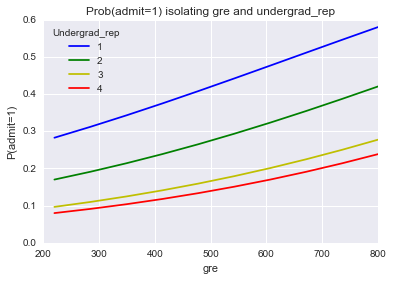

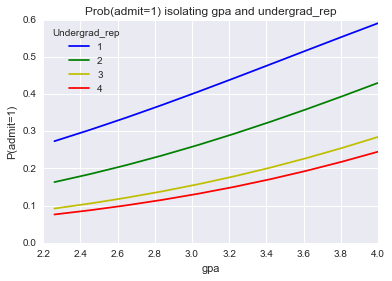

In [110]:
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'undergrad_rep'],
                            aggfunc=np.mean)
    

    colors = 'rbgyrbgy'
    for col in combos.undergrad_rep.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Undergrad_rep')
    pl.title("Prob(admit=1) isolating " + variable + " and undergrad_rep")
    pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')